## The Nearest Neighbor



Nearest-neighbor methods use those observations in the training set $T$ closest in input space to $x$ to form $Y$

Specifically, the $k$-nearest neighbor fit for $Y$ is defined as follows:

$$\hat{Y}  = \frac{1}{k} \sum_{x_i \in N_k(x) } y_i$$

where $N_k(x)$ is the neighborhood of $x$ defined by the $k$ closest points $x_i$ in the training sample.

Closeness implies a metric, which for the moment we assume is *Euclidean distance*. So, in words, we find the $k$ observations with $x_i$ closest to $x$ in input space, and average their responses.

$$d_{ij} = \sqrt{(x_{i1} - x_{j1})^2 + (x_{i2} - x_{j2})^2 + ... + (x_{ip} - x_{jp})^2}$$

This is the distance between the point $i$ and $j$, where $i \neq j $ and $p$ is amount features.

In [17]:
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection

In [2]:
from scipy.stats import uniform

In [29]:
size = 100_000
X = uniform.rvs(size = size)
f = np.sin(X)
y = f + np.random.randn(size)

data_population = pd.DataFrame(dict(X = X, y = y))

data_sample = data_population.sample(300)

X_sample, y_sample = data_sample[['X']].values, data_sample.y.values

In [34]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_sample, y_sample, random_state=123, test_size=0.25)

kneighbor = KNeighborsRegressor(n_neighbors=5)
kneighbor.fit(X_train, y_train)

KNeighborsRegressor()

In [53]:
indices = kneighbor.kneighbors(X_test[50:51, :])[1]

(-5.0, 5.0)

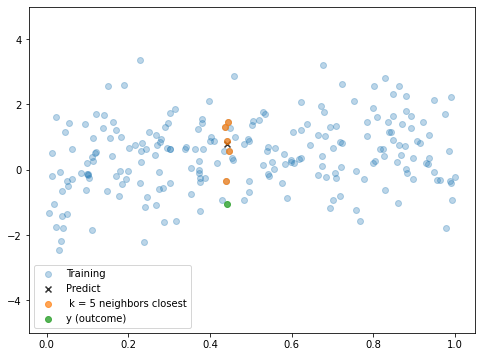

In [81]:
fig, ax = plt.subplots(figsize = (8, 6))

# scatter plot for training data
ax.scatter(X_train.flatten(), y_train, alpha = 0.3, label = 'Training')

# Predicting for data has not seen
# predicting the at point y_50
ax.scatter(
    X_test[50,:].flatten(), 
    kneighbor.predict(X_test[50:51, :]), alpha = 0.8, marker = 'x', color = 'k', label = 'Predict')

# scatter plot the k = 5 neighbors closest at point X_50 (These come from training data)
# these were used for predicting above
ax.scatter(X_train[indices].flatten(), y_train[indices.flatten()], alpha = 0.7, label = ' k = 5 neighbors closest')

# scatter plot for y (outcome) at point y_50
ax.scatter(X_test[50,:].flatten(), y_test[50], alpha = 0.8, label = 'y (outcome)')
ax.legend()
ax.set_ylim(-5, 5)

For classification we only  a step is added,  $\hat{G} = 1$ if $\hat{Y} > 0.5 $

* The training error decreases when $k$ decreases ($k = 1$), and increases when $k$ increases. On the other hand, the test error increases when $k$ decreases.

* The parameters that must fit are $N/k$. To get an idea of why, note that if the neighborhoods were nonoverlapping, there would be N/k neighborhoods and we would fit one parameter (a mean) in each neighborhood.

Resources:

* The Elements of Statistical Learning Data Mining, Inference, and Prediction - Second Edition - Trevor Hastie - Robert Tibshirani - Jerome Friedman. Springer.

* Data Page: https://hastie.su.domains/ElemStatLearn/
